# Visual Document Question Answering: Inference example

In this notebook, we will show how to use a pretrained DocVQA model to answer questions over an image or a pdf file. The pre-trained model is available in huggingface and is trained on DocvQA dataset.

## Dependencies

If not already done, make sure to install PrimeQA with notebooks extras before getting started.

In [25]:
import os
from primeqa.docvqa.models.docvqa_model import DocVQAModel

## Loading pretrained model from huggingface

Use the docvqa model from huggingface.

In [2]:
#load the model from HuggingFace
model = DocVQAModel("impira/layoutlm-document-qa")

<br>

## Sample Document

Download and display an example image from the web.

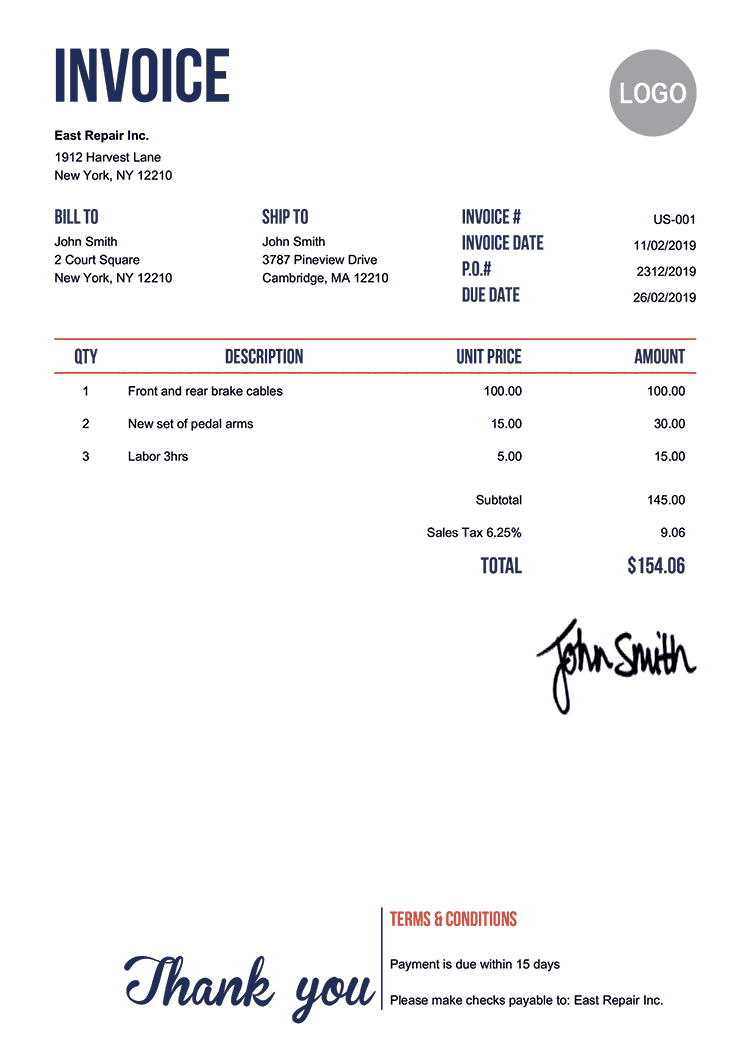

In [1]:
# Load the data
import requests
from IPython.display import Image, display
url = "https://templates.invoicehome.com/invoice-template-us-neat-750px.png"
resp = requests.get(url, stream=True)
with open("sample_image.png", "wb") as png:
    png.write(resp.content)

image = "sample_image.png"
display(Image(filename=image))

Input to the model is a list of `tuples`. Each `tuple` contains an example document and a list of natural language queries.

In [26]:
queries = ["What is the invoice number?", "What is the due date mentioned?"]
samples = [(image, queries)]
print(model.predict(samples, page=1))

if os.path.exists(image):
    os.remove(image)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[{'What is the invoice number?': 'us-001', 'What is the due date mentioned?': '26/02/2019'}]
